# Sentiment Analysis


Sentiment analysis (opinion mining or emotion AI) is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral. [From Oxford](https://www.lexico.com/en/definition/sentiment_analysis)

There are three main elements of a sentiment analysis system:
- Opinion/Emotion (polarity:positive, negative, neutral; emotion:joy, surprise, worry, etc.)
- Subject (the subject of the text)
- Opinion holder

Levels of granularity:
- Document level
- Sentence level
- Aspect level

Type of sentiment analysis algorithms:
- Rule/lexicon-based
- Automatic/ Machine learning


In [34]:
# Import necessary modules
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt

# Import the required NLP packages
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from langdetect import detect_langs # Find out the probabilities for the top languages
from langdetect import detect # Detect the language of the text
import fasttext

# Import classifiers
from sklearn.linear_model import LogisticRegression

## Rule/lexicon-based Approach Using TextBlob

In [29]:
# from textblob import TextBlob

# Generate a text
text = "He is a good person."

# Create a textblob object  
blob_text = TextBlob(text)

# Print out the sentiment 
print(blob_text.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [30]:
two_cities = '''It was the best of times, it was the worst of times, 
                it was the age of wisdom, it was the age of foolishness, 
                it was the epoch of belief, it was the epoch of incredulity, 
                it was the season of Light, it was the season of Darkness, 
                it was the spring of hope, it was the winter of despair, 
                we had everything before us, we had nothing before us, 
                we were all going direct to Heaven, 
                we were all going direct the other way – in short, 
                the period was so far like the present period, 
                that some of its noisiest authorities insisted on its being received, 
                for good or for evil, in the superlative degree of comparison only.
             '''

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


In [46]:
# Read data
movies = pd.read_csv('data/sentiment/IMDB.csv', usecols=[1,2])

In [7]:
movies.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


In [26]:
# Structure of the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
review    7501 non-null object
label     7501 non-null int64
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [19]:
# Number of positive and negative reviews
print('Number of positive and negative reviews: \n', movies.label.value_counts())

# Proportion of positive and negative reviews
print('Proportion of positive and negative reviews: \n', movies.label.value_counts() / len(movies))

Number of positive and negative reviews: 
 0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews: 
 0    0.504199
1    0.495801
Name: label, dtype: float64


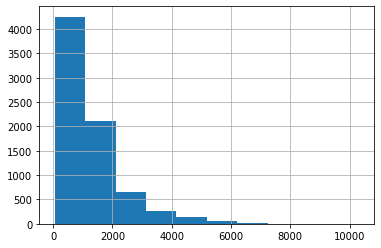

In [25]:
# Length of the reviews (# char)
movies.review.str.len().hist()

In [76]:
# Review of the movie "Titanic"
titanic = movies.iloc[4930]

print("label: ", titanic.label)

# Create a textblob object  
blob_titanic = TextBlob(titanic.review)

# Print out its sentiment  
print(blob_titanic.sentiment)

label:  1
Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


Label and the polarity matches for the movie Titanic.

### Word/Text Cloud

In [50]:
# from wordcloud import WordCloud, STOPWORDS

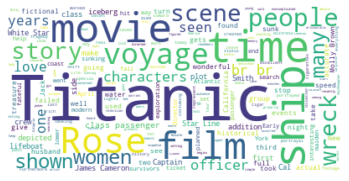

In [60]:
# Generate the word cloud
titanic_cloud = WordCloud(background_color="white").generate(titanic.review)

# Create a figure of the generated cloud
plt.imshow(titanic_cloud, interpolation='bilinear')  # the interpolation argument makes the word cloud appear more smoothly
plt.axis('off')
# Display the figure
plt.show()

We can remove stop words from word clouds using `stopwords` parameter.

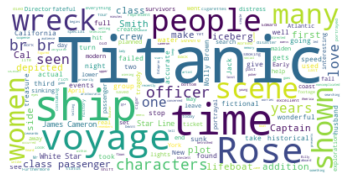

In [82]:
# Define the stopwords list
my_stopwords = STOPWORDS.update(["movie", "movies", "film", "films", "watch", "story"])

# Generate the word cloud
titanic_cloud = WordCloud(background_color="white", 
                          stopwords=my_stopwords).generate(titanic.review)

# Create a figure of the generated cloud
plt.imshow(titanic_cloud, interpolation='bilinear')  # the interpolation argument makes the word cloud appear more smoothly
plt.axis('off')
# Display the figure
plt.show()

## Bag of Words (BOW)

BOW is a simple but effective method to build a vocabulary of all the words occurring in a text. It creates a numeric representation of the document.

Types:
- Unigrams : single tokens 
- Bigrams: pairs of tokens 
- Trigrams: triples of tokens 
- n-grams: sequence of n-tokens

In [52]:
# Read data
amazon = pd.read_csv("data/sentiment/amazon.csv", index_col=0)

In [5]:
amazon.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


### Count Vectorizer

In [10]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)

# Fit the vectorizer
vect.fit(amazon.review)

# Transform the review column
X_review = vect.transform(amazon.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


### Extra: Unigrams vs n-grams Example

- Only unigrams: `ngram_range = (1, 1)`
- Uni- and bigrams: `ngram_range = (1, 2)`
- ...

#### Comparing Unigrams

The following texts have opposite meaning, but their BOW representation are the same.

In [23]:
happy = ["I am happy, not sad."]
sad = ["I am sad, not happy."]

# Build the vectorizer and fit it
happy_vect = CountVectorizer()
happy_bow = happy_vect.fit_transform(happy)

# Build the vectorizer and fit it
sad_vect = CountVectorizer()
sad_bow = sad_vect.fit_transform(sad)

# Compare two bow representations
print(happy, '\n', pd.DataFrame(happy_bow.toarray(), columns=happy_vect.get_feature_names()))
print(sad, '\n', pd.DataFrame(sad_bow.toarray(), columns=sad_vect.get_feature_names()))

['I am happy, not sad.'] 
    am  happy  not  sad
0   1      1    1    1
['I am sad, not happy.'] 
    am  happy  not  sad
0   1      1    1    1


#### Comparing Bigrams

n-grams helps us better evaluate sentiments.

In [24]:
happy = ["I am happy, not sad."]
sad = ["I am sad, not happy."]

# Build the vectorizer and fit it
happy_vect = CountVectorizer(ngram_range=(1,2))
happy_bow = happy_vect.fit_transform(happy)

# Build the vectorizer and fit it
sad_vect = CountVectorizer(ngram_range=(1,2))
sad_bow = sad_vect.fit_transform(sad)

# Compare two bows
print(happy, '\n', pd.DataFrame(happy_bow.toarray(), columns=happy_vect.get_feature_names()))
print(sad, '\n', pd.DataFrame(sad_bow.toarray(), columns=sad_vect.get_feature_names()))

['I am happy, not sad.'] 
    am  am happy  happy  happy not  not  not sad  sad
0   1         1      1          1    1        1    1
['I am sad, not happy.'] 
    am  am sad  happy  not  not happy  sad  sad not
0   1       1      1    1          1    1        1


### n-grams

In [36]:
# Build the vectorizer, specify token sequence and fit
vect = CountVectorizer(ngram_range=(2,2), max_features=100)
vect.fit(amazon.review)

# Transform the review column
X_review = vect.transform(amazon.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

,about the,all the,and it,and the,as the,at all,at the,book is,book was,bought this,...,was very,with the,with this,would be,would have,you are,you can,you have,you want,you will
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(amazon.review)

# Transform the review
X_review = vect.transform(amazon.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
X_df.head()

,able to,about how,about it,about the,about this,after reading,after the,again and,ago and,agree with,...,you think,you to,you ve,you want,you will,you won,you would,your money,your own,your time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Extracting Features from Text

### Word Counts

In [40]:
# Transform the string to word tokens
print(word_tokenize(amazon.review[0]))

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [48]:
# Tokenize the reviews
review_tokens = [word_tokenize(item) for item in amazon.review]
print(review_tokens[:2])

[['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^'], ['The', 'best', 'soundtrack', 'ever', 'to', 'anything', '.', ':', 'I', "'m", 'reading', 'a', 'lot', 'of', 'reviews', 'saying', 'that', 'this', 'is', 'the', 'best', "'game", 'soundtrack', "'", 'and', 'I', 'figured', 'that', 'I', "'d", 'write', 'a', 'review', 'to', 'disagree', 'a', 'bit', '.', 'This', '

In [51]:
# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(review_tokens)):
     len_tokens.append(len(review_tokens[i]))

# Create a new feature for the lengh of each review
amazon['n_words'] = len_tokens 

amazon.head()

,score,review,n_words
0,1,Stuning even for the non-gamer: This sound tr...,87
1,1,The best soundtrack ever to anything.: I'm re...,109
2,1,Amazing!: This soundtrack is my favorite musi...,165
3,1,Excellent Soundtrack: I truly like this sound...,145
4,1,"Remember, Pull Your Jaw Off The Floor After H...",109


### Language Detection

#### `langdetect`

In [66]:
# Import the language detection function and package
# from langdetect import detect_langs # ind out the probabilities for the top languages
# from langdetect import detect # detect the language of the text

deu = "Ich komme aus der Türkei."
tr = "Türkiye'den geliyorum."
mix = "Ich komme aus der Türkei. geliyorum."

# Detect the language of the string
print(detect_langs(deu))
print(detect_langs(tr))
print(detect_langs(mix))

[de:0.9999970729529929]
[tr:0.9999973965203564]
[de:0.8571404875236557, tr:0.14285894819212433]


> [Note](https://github.com/Mimino666/langdetect): `langdetect`s language detection algorithm is non-deterministic, which means that if you try to run it on a text which is either too short or too ambiguous, you might get different results everytime you run it. 

In [73]:
sentences = [deu, tr, mix]
languages = []

# Loop over the sentences in the list and detect their language
for sentence in range(len(sentences)):
    languages.append(detect_langs(sentences[sentence]))
    
print('The detected languages are: ', languages)

The detected languages are:  [[de:0.9999972083375406], [tr:0.9999977855242717], [de:0.999994334217459]]


#### `fasttext`

In [67]:
# Load the pretrained language model
language_model = fasttext.load_model('data/lid.176.bin')

# Print results
print(language_model.predict(deu))
print(language_model.predict(tr))
print(language_model.predict(mix))

(('__label__de',), array([0.99987382]))
(('__label__tr',), array([0.99999571]))
(('__label__de',), array([0.87219495]))


## Preprocessing (Tweet Data Example)

In [2]:
# Read data
tweets = pd.read_csv("data/sentiment/airline_tweets.csv")
tweets = tweets[['airline_sentiment', 'text', 'negativereason']]

# Drop rows with missing values
tweets.dropna(inplace=True)

# Print head of tweets dataset
tweets.head()

,airline_sentiment,text,negativereason
3,negative,@VirginAmerica it's really aggressive to blast...,Bad Flight
4,negative,@VirginAmerica and it's a really big bad thing...,Can't Tell
5,negative,@VirginAmerica seriously would pay $30 a fligh...,Can't Tell
15,negative,@VirginAmerica SFO-PDX schedule is still MIA.,Late Flight
17,negative,@VirginAmerica I flew from NYC to SFO last we...,Bad Flight


In [111]:
tweets.shape

(9178, 3)

### Stop Words

In [112]:
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)

# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000419  000ft  000lbs  0016  00a  00am  00p  00pm  ...  zone  \
0   0    0       0      0       0     0    0     0    0     0  ...     0   
1   0    0       0      0       0     0    0     0    0     0  ...     0   
2   0    0       0      0       0     0    0     0    0     0  ...     0   
3   0    0       0      0       0     0    0     0    0     0  ...     0   
4   0    0       0      0       0     0    0     0    0     0  ...     0   

   zones  zoom  zouowgv3q6  zrh  zukes  zurich  zv6cfpohl5  zvfmxnuelj  \
0      0     0           0    0      0       0           0           0   
1      0     0           0    0      0       0           0           0   
2      0     0           0    0      0       0           0           0   
3      0     0           0    0      0       0           0           0   
4      0     0           0    0      0       0           0           0   

   zzps5ywve2  
0           0  
1           0  
2           0  
3           0  
4           0  

[

In [115]:
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

['zira2z3udc', 'zkatcher', 'zkoe6clgiu', 'zl4bvexmcj', 'zombie', 'zone', 'zones', 'zoom', 'zouowgv3q6', 'zrh', 'zukes', 'zurich', 'zv6cfpohl5', 'zvfmxnuelj', 'zzps5ywve2']
['attendant', 'bad', 'booking', 'cancelled', 'complaints', 'customer', 'damaged', 'flight', 'issue', 'late', 'longlines', 'lost', 'luggage', 'problems', 'service', 'tell']


### Specifying a Token Pattern

Specifying a custom token pattern instead of using the predefined one is a nice way to limit the size of the vocabulary and use problem specific tokens. Default regexp token pattern in CountVectorizer,  `(?u)\b\w\w+\b`, selects tokens of **2 or more alphanumeric characters** (punctuation is completely ignored and always treated as a token separator).

- `(?u)`: [re.U](https://docs.python.org/2/library/re.html#re.U)
- `\b`: matches at a position (zero-length) that is called a "word boundary"
- `\w`: word characters. equivalent to `[a-zA-Z0-9_]`
- `\b\w\w+\b`: 2 or more alphanumeric characters

Important: This pattern ignores words like "don't" or "haven't". However, they may be useful in sentiment analysis.

In [124]:
my_string = "#hashtag @mention111 0tohero i am happy... great_work"

# Split my_string on given pattern and print the result
pattern = r"(?u)\b\w\w+\b"
print(re.findall(pattern, my_string))

['hashtag', 'mention111', '0tohero', 'am', 'happy', 'great_work']


In [130]:
my_string = "#hashtag @mention111 0tohero i am happy... great_work"

# Split my_string on given and print the result
pattern = r"\b[^\d\W][^\d\W]+\b" # words with 2+ characters without digits
print(re.findall(pattern, my_string))

['hashtag', 'am', 'happy', 'great_work']


In [133]:
# nltk function
print(word_tokenize(my_string))

['#', 'hashtag', '@', 'mention111', '0tohero', 'i', 'am', 'happy', '...', 'great_work']


In [134]:
# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']
Cleaned tokens:  ['VirginAmerica', 'it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']


In [8]:
tweets.text[:10]

3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
15        @VirginAmerica SFO-PDX schedule is still MIA.
17    @VirginAmerica  I flew from NYC to SFO last we...
20    @VirginAmerica why are your first fares in May...
24    @VirginAmerica you guys messed up my seating.....
25    @VirginAmerica status match program.  I applie...
26    @VirginAmerica What happened 2 ur vegan food o...
28    @VirginAmerica amazing to me that we can't get...
Name: text, dtype: object

In [13]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets.text[:3].tolist()]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('\nLast item in list of alphanumerics: ', let_digits[2])
print('\nLast item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['VirginAmerica', 'seriously', 'would', 'pay', 'a', 'flight', 'for', 'seats', 'that', 'did', 'have', 'this', 'playing', 'it', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']

Last item in list of alphanumerics:  ['VirginAmerica', 'seriously', 'would', 'pay', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', 'have', 'this', 'playing', 'it', 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']

Last item in the list of digits:  ['30']


In [131]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  10836
Length of vectorizer 2:  8917


### Stemming and Lemmatization

"**Stemming** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

**Lemmatization** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma." [Stanford NLP](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

In [17]:
# Create a string
morpheus = '''
Have you ever had a dream, Neo, that you seemed so sure it was real? 
But if you were unable to wake up from that dream, how would you tell 
the difference between the dream world & the real world?"

'''
# Initiate PorterStemmer and WordNetLemmatizer from NLTK
porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the string
tokens = word_tokenize(morpheus)

In [21]:
import time

In [22]:
# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0008540153503417969
Stemmed tokens:  ['have', 'you', 'ever', 'had', 'a', 'dream', ',', 'neo', ',', 'that', 'you', 'seem', 'so', 'sure', 'it', 'wa', 'real', '?', 'but', 'if', 'were', 'unabl', 'to', 'wake', 'up', 'from', 'that', 'dream', ',', 'how', 'would', 'you', 'tell', 'the', 'differ', 'between', 'the', 'dream', 'world', '&', 'the', 'real', 'world', '?']


In [23]:
# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  1.5948243141174316
Lemmatized tokens:  ['Have', 'you', 'ever', 'had', 'a', 'dream', ',', 'Neo', ',', 'that', 'you', 'seemed', 'so', 'sure', 'it', 'wa', 'real', '?', 'But', 'if', 'were', 'unable', 'to', 'wake', 'up', 'from', 'that', 'dream', ',', 'how', 'would', 'you', 'tell', 'the', 'difference', 'between', 'the', 'dream', 'world', '&', 'the', 'real', 'world', '?']


Lemmatization take much more time than stemming. However, stemming produces roots of the words which may be meaningless, whereas lemmatization produces actual words.

In [24]:
deutsch = ["Immer weniger Deutsche wollen auf dem Land leben, obwohl es dort genug Arbeit gibt.",
           "Aber die öffentliche Infrastruktur ist schlechter als in der Stadt, und oft funktioniert das Internet nicht.", 
           "Das soll sich ändern."]

In [31]:
from nltk.stem import SnowballStemmer

# Import the German SnowballStemmer
GermanStemmer = SnowballStemmer("german")

# Create a list of tokens
tokens = [word_tokenize(string) for string in deutsch] 
# Stem the list of tokens
stemmed_tokens = [[GermanStemmer.stem(word) for word in token] for token in tokens]

# Print the first item of the stemmed tokenss
print(stemmed_tokens)

[['imm', 'wenig', 'deutsch', 'woll', 'auf', 'dem', 'land', 'leb', ',', 'obwohl', 'es', 'dort', 'genug', 'arbeit', 'gibt', '.'], ['aber', 'die', 'offent', 'infrastruktur', 'ist', 'schlecht', 'als', 'in', 'der', 'stadt', ',', 'und', 'oft', 'funktioniert', 'das', 'internet', 'nicht', '.'], ['das', 'soll', 'sich', 'and', '.']]


**Applying to tweets:**

In [33]:
# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweets.text[:10]]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'it', "'s", 'realli', 'aggress', 'to', 'blast', 'obnoxi', '``', 'entertain', "''", 'in', 'your', 'guest', "'", 'face', '&', 'amp', ';', 'they', 'have', 'littl', 'recours']


## Tf-Idf

_Term Frequency (TF) :_ How often a given word appears within a document in the corpus.

_Inverse Term Frequency (IDF):_  Log-ratio between the total number of documents and the number of documents that contain a specific word.

**Count Vectorizer vs Tf-Idf:**

In [40]:
neo = ["I know you're out there.",
       "I can feel you now.",
       "I know that you're afraid."]

# Call the vectorizer and fit it
neo_vect = CountVectorizer().fit(neo)

# Create the tfidf representation
neo_count = neo_vect.transform(neo)

# Print the result 
pd.DataFrame(neo_count.toarray(), columns=neo_vect.get_feature_names())

,afraid,can,feel,know,now,out,re,that,there,you
0,0,0,0,1,0,1,1,0,1,1
1,0,1,1,0,1,0,0,0,0,1
2,1,0,0,1,0,0,1,1,0,1


In [41]:
neo = ["I know you're out there.",
       "I can feel you now.",
       "I know that you're afraid."]

# Call the vectorizer and fit it
neo_vect = TfidfVectorizer().fit(neo)

# Create the tfidf representation
neo_tfidf = neo_vect.transform(neo)

# Print the result 
pd.DataFrame(neo_tfidf.toarray(), columns=neo_vect.get_feature_names())

,afraid,can,feel,know,now,out,re,that,there,you
0,0.000000,0.000000,0.000000,0.406192,0.000000,0.534093,0.406192,0.000000,0.534093,0.315444
1,0.000000,0.546454,0.546454,0.000000,0.546454,0.000000,0.000000,0.000000,0.000000,0.322745
2,0.534093,0.000000,0.000000,0.406192,0.000000,0.000000,0.406192,0.534093,0.000000,0.315444


### Tweet Example

In [43]:
# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X = pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
X.head()

,aa,agent,airline,airport,americanair,amp,bad,bag,baggage,bags,...,ve,virginamerica,wait,waiting,want,way,weather,won,work,worst
0,0.0,0.0,0.0,0.0,0.0,0.509923,0.000000,0.0,0.0,0.0,...,0.0,0.620798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.602806,0.0,0.0,0.0,...,0.0,0.575815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.410963,0.0,0.0,0.0,...,0.0,0.392562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.619339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
